<a href="https://colab.research.google.com/github/mohithaareti/task-5/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import graphviz


In [2]:
df = pd.read_csv("heart.csv")

In [4]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [6]:
X = df.drop("target", axis=1)
y = df["target"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [21]:
y_pred_dt = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_acc:.3f}")


Decision Tree Accuracy: 0.985


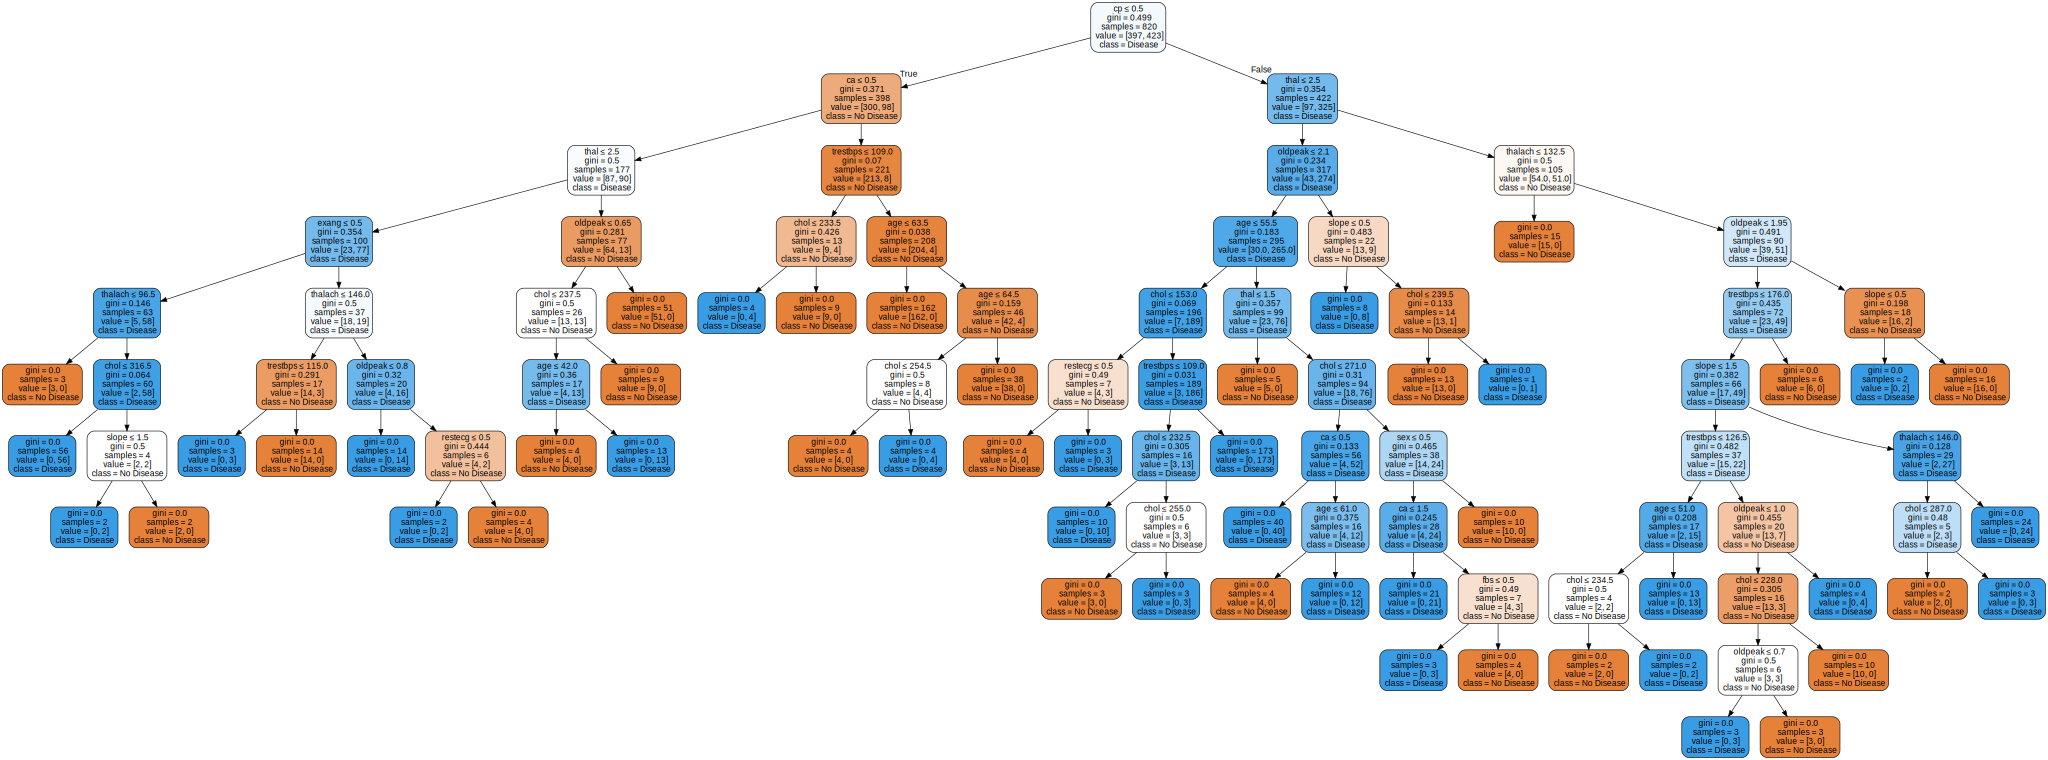

In [22]:
dot_data = export_graphviz(
    dt_clf,
    out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

In [23]:
dt_clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf_limited.fit(X_train, y_train)
y_pred_limited = dt_clf_limited.predict(X_test)
limited_acc = accuracy_score(y_test, y_pred_limited)
print(f"Decision Tree (max_depth=3) Accuracy: {limited_acc:.3f}")

Decision Tree (max_depth=3) Accuracy: 0.780


In [24]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.3f}")


Random Forest Accuracy: 0.985


In [25]:
importances = rf_clf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", feat_imp)



Feature Importances:
 cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


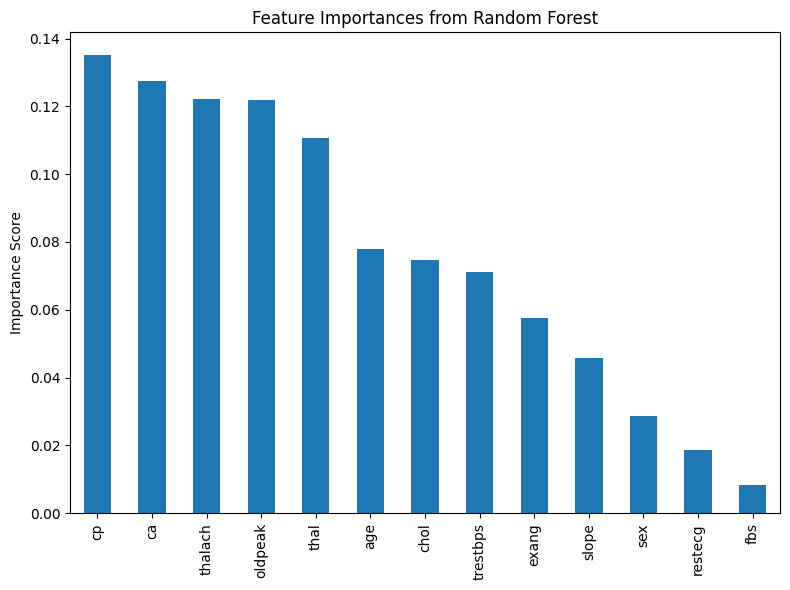

In [26]:
plt.figure(figsize=(8, 6))
feat_imp.plot(kind="bar")
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.savefig("feature_importances.png")
plt.show()


In [27]:
cv_scores_dt = cross_val_score(dt_clf, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5)

print(f"Decision Tree CV Mean Accuracy: {cv_scores_dt.mean():.3f}")
print(f"Random Forest CV Mean Accuracy: {cv_scores_rf.mean():.3f}")

Decision Tree CV Mean Accuracy: 1.000
Random Forest CV Mean Accuracy: 0.997
